In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
daily_acc = pd.read_csv('arp_DailyAccidents_sixCities_daily_Summer.csv', index_col=[0],parse_dates=[0])

In [3]:
daily_acc.head()

,Accidents
Date,
2016-06-14,5
2016-06-17,4
2016-06-21,209
2016-06-22,319
2016-06-23,344


In [4]:
daily_acc.shape

(379, 1)

In [5]:
#daily_acc.describe()

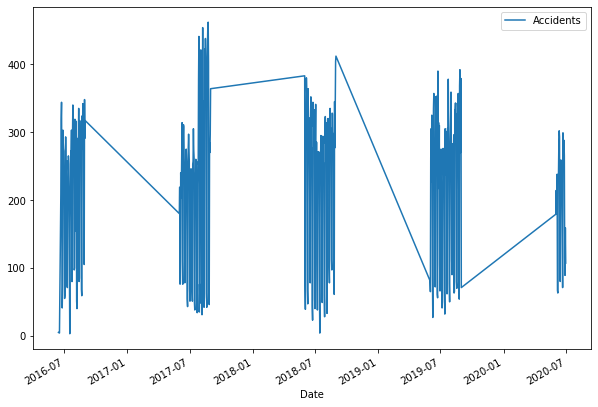

In [5]:
daily_acc.plot(figsize=(10,7))
plt.show()

In [6]:
# daily_acc_mean = daily_acc.rolling(window = 30).mean()
# daily_acc_mean.plot(figsize=(10,7))
# plt.show()

### 2. Auto ARIMA Model

In [8]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [9]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(daily_acc)

(0.01, False)

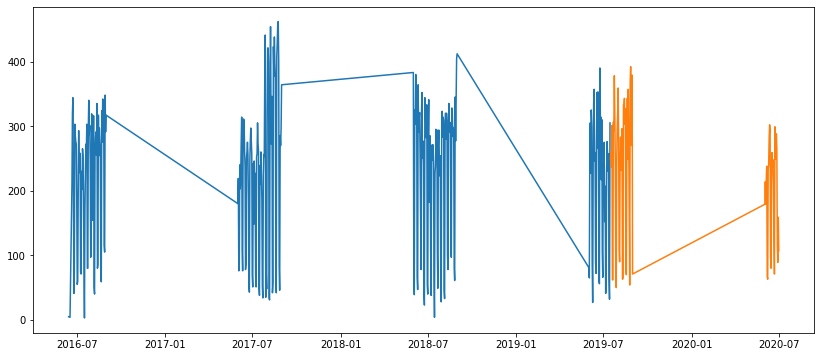

In [10]:
#Spliting the dataset into train and test
size = int(len(daily_acc) * 0.80)
train = daily_acc[0:size] 
test = daily_acc[size:len(daily_acc)]

plt.figure(figsize=(14,6))
plt.plot(train)
plt.plot(test)

In [11]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3955.514, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3814.367, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3957.254, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3750.476, Time=0.52 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=3684.454, Time=1.13 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=3657.132, Time=4.04 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=inf, Time=9.48 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=3568.812, Time=11.87 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.01 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=24.21 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=inf, Time=15.27 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=7.63 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=inf, Time=40.00 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=3628.79

In [12]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  303
Model:             SARIMAX(1, 1, 0)x(4, 1, [1], 12)   Log Likelihood               -1777.406
Date:                              Thu, 28 Jan 2021   AIC                           3568.812
Time:                                      16:28:27   BIC                           3594.501
Sample:                                           0   HQIC                          3579.104
                                              - 303                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5304      0.058     -9.128      0.000      -0.644      -0.417
ar.S.L12      -2.0507      0.045    -45.714      0.000      -2.139      -1.963
ar.S.L24      -2.3198      0.077    -30.061      0.000      -2.471      -2.169
ar.S.L36      -1.7802      0.073    -24.429      0.000      -1.923      -1.637
ar.S.L48      -0.7858      0.035    -22.473      0.000      -0.854      -0.717
ma.S.L12       0.8802      0.071     12.426      0.000       0.741       1.019
sigma2      9812.8158    992.238      9.890      0.000    7868.066    1.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                 5.22
Prob(Q):                              0.30   Prob(JB):                         0.07
Heteroskedasticity (H):               0.90   Skew:                             0.32
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
prediction1 = pd.DataFrame(arima_model.predict(n_periods = 76),index=test.index)
prediction1.columns = ['predicted_acc']
prediction1

,predicted_acc
Date,
2019-07-16,333.676608
2019-07-17,339.269592
2019-07-18,404.682798
2019-07-19,290.570233
2019-07-20,124.861886
...,...
2020-06-26,268.666612
2020-06-27,166.240831
2020-06-28,214.474989


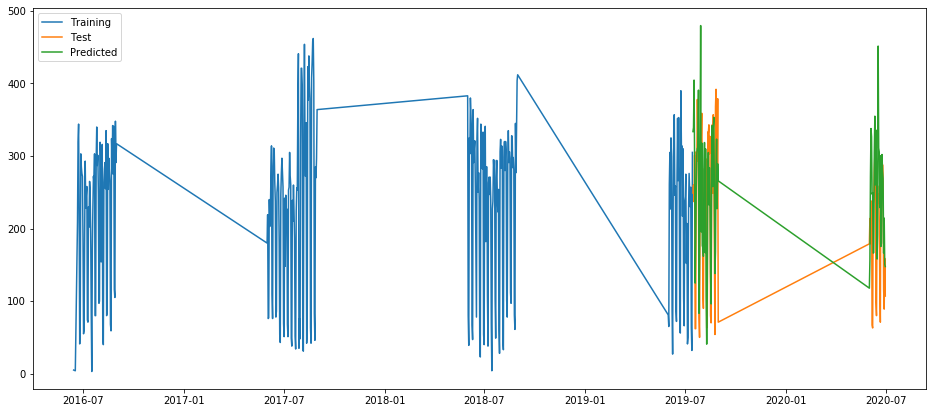

In [14]:
plt.figure(figsize=(16,7))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction1,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [15]:
from sklearn.metrics import r2_score
test['predicted_acc'] = prediction1
r2_score(test['Accidents'], test['predicted_acc'])

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0028458890381501956

In [16]:
test.head(15)

,Accidents,predicted_acc
Date,,
2019-07-16,249,333.676608
2019-07-17,260,339.269592
2019-07-18,237,404.682798
2019-07-19,301,290.570233
2019-07-20,62,124.861886
2019-07-21,62,184.749894
2019-07-22,306,257.529943
2019-07-23,293,303.990301
2019-07-24,378,310.689631


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

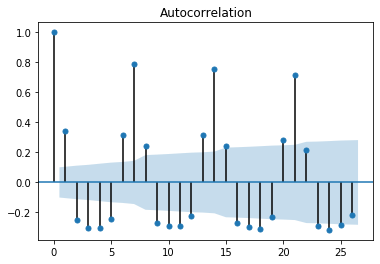

In [23]:
#plot_acf is to determine Q

plot_acf(daily_acc)
plt.show()

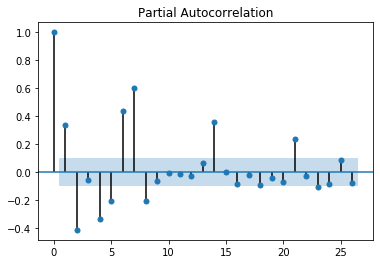

In [24]:
#determine the value of P

plot_pacf(daily_acc)
plt.show()

In [28]:

size = int(len(daily_acc) * 0.80)
train = daily_acc[0:size] 
test = daily_acc[size:len(daily_acc)]

#print(train.size,test.size)

In [29]:
#9,1,5 rmse=89. r2 =32 --9,2,6 rmse=88 r2 =34
from statsmodels.tsa.arima_model import ARIMA
acc_model = ARIMA(train,order=(4,1,2))

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

acc_model_fit = acc_model.fit()

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [31]:
test.size

76

In [34]:
acc_forecast = acc_model_fit.forecast(steps=76)[0]

In [35]:
print('RMSE: ',np.sqrt(mean_squared_error(test,acc_forecast)))

RMSE:  86.87372813747021


In [36]:
acc_forecast_df = pd.DataFrame(acc_forecast, index=test.index)

In [37]:
acc_forecast_df.rename(columns={0:'Predictions'},inplace=True)

In [38]:
prediction_df= acc_forecast_df
test_df= test

test_prediction= test_df.join(prediction_df, on='Date')
test_prediction.head(10)

,Accidents,Predictions
Date,,
2019-07-16,249,302.704378
2019-07-17,260,242.464261
2019-07-18,237,301.462278
2019-07-19,301,214.635754
2019-07-20,62,84.778413
2019-07-21,62,138.754248
2019-07-22,306,237.242731
2019-07-23,293,274.980165
2019-07-24,378,308.533648


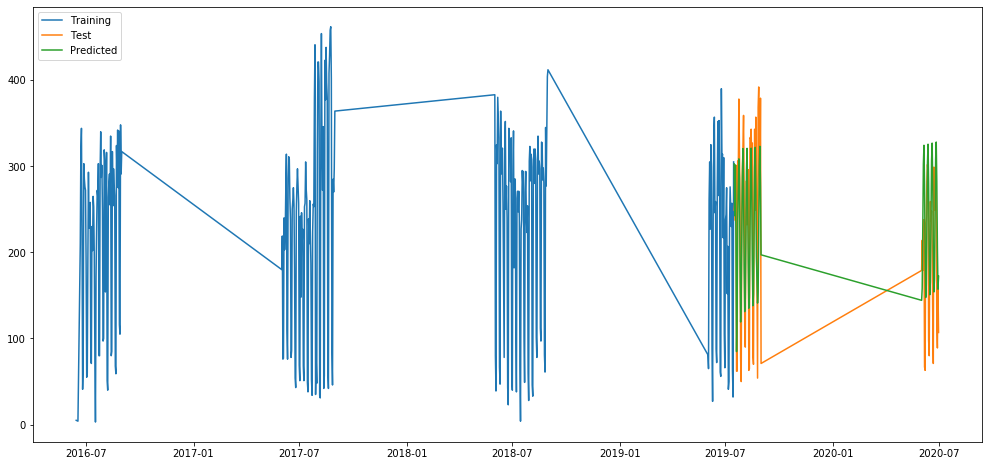

In [39]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(acc_forecast_df,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [40]:
print('R-Squared score: ',r2_score(test,acc_forecast))

R-Squared score:  0.23993193722770734


In [35]:
#f1_score(test, acc_forecast)

In [41]:
from sklearn.metrics import f1_score

In [42]:
from pmdarima.arima import auto_arima

In [43]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [44]:
arima_m = auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3,
                     start_P=0, D=1, start_Q=0, max_P=3, max_D=3, max_Q=3, m=12,
                     seasonal=True, stepwise=True, suppress_warnings=True,error_action='warn',
                     trace=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3955.514, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3814.367, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3957.254, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3750.476, Time=0.50 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=3684.454, Time=1.15 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=5.97 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=3709.677, Time=0.79 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=inf, Time=3.23 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=inf, Time=3.86 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(2,1,1)(3,1,0)[12]             : AIC=inf, Time=4.84 sec
 ARIMA(1,1,0)(3,1,0)[12] intercept   : AIC=3686.448, Time=2.99 sec

Best model:  ARIMA(1,1,0)(3,1,0)[12]          
Total 

In [45]:
arima_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  303
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood               -1837.227
Date:                            Tue, 26 Jan 2021   AIC                           3684.454
Time:                                    02:18:23   BIC                           3702.803
Sample:                                         0   HQIC                          3691.806
                                            - 303                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3590      0.086     -4.183      0.000      -0.527      -0.191
ar.S.L12      -1.2253      0.051    -23.879      0.000      -1.326      -1.125
ar.S.L24      -1.0715      0.074    -14.561      0.000      -1.216      -0.927
ar.S.L36      -0.5458      0.060     -9.155      0.000      -0.663      -0.429
sigma2      1.702e+04   1626.471     10.464      0.000    1.38e+04    2.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.45   Jarque-Bera (JB):                16.46
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.58
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
predictn = pd.DataFrame(arima_m.predict(n_periods = 76), index=test.index)
predictn.columns =['predictionx']
predictn

,predictionx
Date,
2019-07-16,319.594837
2019-07-17,434.533260
2019-07-18,522.515571
2019-07-19,275.333287
2019-07-20,231.871889
...,...
2020-06-26,403.041147
2020-06-27,314.123096
2020-06-28,382.030412


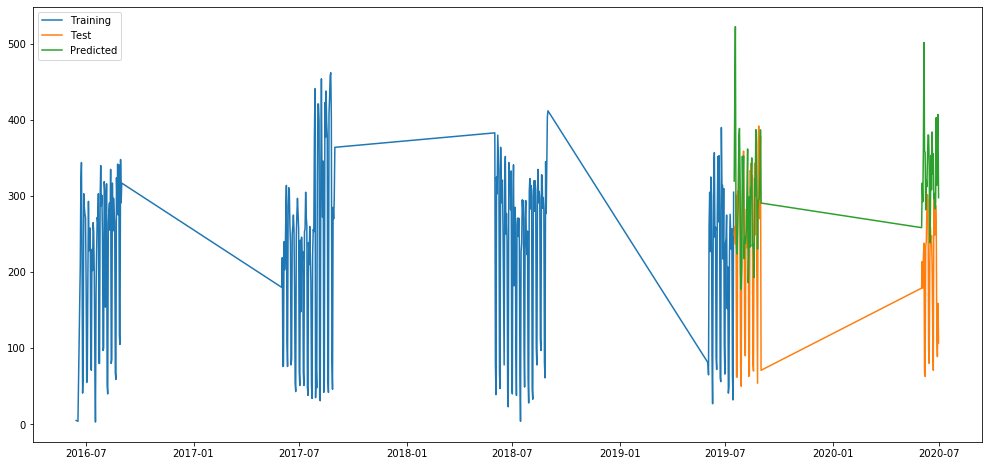

In [47]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(predictn,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [48]:
print('R-Squared score: ',r2_score(test,predictn))

R-Squared score:  -0.8992179046954729
